<a href="https://colab.research.google.com/github/Paevjc/Human-Activity-Recognition/blob/main/MHealth_Deep_learning%2BGen_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSA Internal Project: Group 4
### Author: Jeriel, Elly, Shaniah, Harshni, Ziyan
### Dataset: MHealth Dataset
### Source: Kaggle https://www.kaggle.com/datasets/nirmalsankalana/mhealth-dataset-data-set-csv/data

GPU: T4


**Problem Statement:** Individuals in healthcare settings, such as physiotherapists or elderly care providers, would benefit from an automated system that accurately classifies human activities using wearable sensor data. The system should provide real-time insights into activities, aiding in the monitoring of patient mobility and overall health.
The goal is to create a machine learning pipeline that can process accelerometer and gyroscope data and classify activities accurately, enabling healthcare providers to make informed decisions about patient care.


**Gen AI:** The goal is to design a user-friendly interface (UI) that enables non-programmers to execute queries easily. This UI will assist them in reviewing sensor readings or dataset outputs for an initial assessment.

## Data Summary


#### Activities: 12
L1: Standing still (1 min)\
L2: Sitting and relaxing (1 min)\
L3: Lying down (1 min)\
L4: Walking (1 min)\
L5: Climbing stairs (1 min)\
L6: Waist bends forward (20x)\
L7: Frontal elevation of arms (20x)\
L8: Knees bending (crouching) (20x)\
L9: Cycling (1 min)\
L10: Jogging (1 min)\
L11: Running (1 min)\
L12: Jump front & back (20x)

#### Sensor Devices: 2
alx: acceleration from the left-ankle sensor (X axis)\
aly: acceleration from the left-ankle sensor (Y axis)\
alz: acceleration from the left-ankle sensor (Z axis)\
glx: gyro from the left-ankle sensor (X axis)\
gly: gyro from the left-ankle sensor (Y axis)\
glz: gyro from the left-ankle sensor (Z axis)\
arx: acceleration from the right-lower-arm sensor (X axis)\
ary: acceleration from the right-lower-arm sensor (Y axis)\
arz: acceleration from the right-lower-arm sensor (Z axis)\
grx: gyro from the right-lower-arm sensor (X axis)\
gry: gyro from the right-lower-arm sensor (Y axis)\
grz: gyro from the right-lower-arm sensor (Z axis)\
subject: volunteer number\
Activity: corresponding activity

#### Subjects: 10


# Upload Necessary Files

*   Mhealth zip
*   requirement.txt
*   Mhealth.db
*   template.env
*   Set GPU: T4

# 1. Import Necessary Libraries

In [ ]:
!pip install httpx

  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
Using cached httpx-0.28.1-py3-none-any.whl (73 kB)


In [ ]:
# Core Libraries
import os
import random
import json
import uuid
import hashlib
import zipfile
import sqlite3
from datetime import datetime
from typing import List, Sequence, TypedDict
from typing_extensions import Annotated

# Data Processing and Analysis
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Machine Learning Frameworks
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM, SeparableConv1D, MaxPooling1D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import IsolationForest

from keras.models import Sequential
from keras.layers import Dense

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display, Image


# AI and Language Models
import openai
from langchain import hub
from langchain_core.prompts import MessagesPlaceholder
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.messages import SystemMessage, HumanMessage
from langchain.prompts import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
    SystemMessagePromptTemplate,
)
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import create_retrieval_chain
from langchain_community.utilities import SQLDatabase
from langchain.chains import create_history_aware_retriever
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_community.vectorstores import Chroma, InMemoryVectorStore
from langchain_community.tools.sql_database.tool import QuerySQLDataBaseTool
from langchain.agents import initialize_agent, Tool
from langchain.chat_models import ChatOpenAI
from langchain.memory import ConversationBufferMemory
from IPython.display import Image, display
from langgraph.graph import START, StateGraph
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from langchain_openai import ChatOpenAI
from openai import OpenAI
import gradio as gr

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Other Tools and Utilities
from tqdm import tqdm
import cv2
from dotenv import load_dotenv
from pprint import pprint
import joblib



# 1.1 Loading of Dataset

In [ ]:
# File Path
zip_file_path='Mobile_Health_Human_Behaviour_Analysis.zip'
extraction_path=""

In [ ]:
# Extract File from Zip File
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(extraction_path)

    for root, dirs, files in os.walk('Mobile_Health_Human_Behaviour_Analysis/'):
      print(root, "contains", len(files), "files and", len(dirs), "dictionaries.")

In [ ]:
# Load from CSV
csv_path = 'mhealth_raw_data.csv'
df = pd.read_csv(csv_path)
# Connect to the SQLite database
conn = sqlite3.connect('mhealth.db')

# Create and populate the table
df.to_sql('mobile_health', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

# 2. Data Preprocessing and Transformation

## 2.1 Standardisation and Splitting of Dataset

In [ ]:
# resampling(downsampling) activity 0 to 30720 observations

df_activity_0 = df[df['Activity'] == 0]
df_activity_else = df[df['Activity'] != 0]

df_activity_0 = df_activity_0.sample(n=30720, random_state=1)
df = pd.concat([df_activity_0, df_activity_else])

In [ ]:
# Make a copy of the dataframe before modifying
X = df.drop(['Activity', 'subject'], axis=1).copy()
y = df['Activity']

In [ ]:
print(y)

978959      0
332102      0
153015      0
776193      0
641719      0
           ..
1213641    12
1213642    12
1213643    12
1213644    12
1213645    12
Name: Activity, Length: 373915, dtype: int64


In [ ]:
# Train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
num_features = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz']

# Numerical transformer (Impute missing values and scale numerical features)
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale the features
])

# Apply both transformers
data_transformer = ColumnTransformer(
    transformers=[
        ('numerical', num_transformer, num_features)
    ])

# Fit and transform the training data, and transform the test data
X_train_transformed = data_transformer.fit_transform(X_train)
X_test_transformed = data_transformer.transform(X_test)

# Ensure numerical data is in float32 type
X_train = X_train_transformed.astype(np.float32)
X_test = X_test_transformed.astype(np.float32)

# Verify the output
print(X_test.shape)

(74783, 12)


In [ ]:
# summary of dataframe
display(df)
df.info()
df['Activity'].value_counts()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
978959,1.56440,-9.3953,-0.912450,-0.54360,-0.89869,-0.25933,-6.0364,4.6566,-4.34010,-0.16863,0.55236,-0.918100,0,subject8
332102,0.98850,-9.6289,1.465900,-0.58998,-0.75047,0.32809,-9.1577,1.4012,3.12210,-0.81765,0.60986,-0.066810,0,subject3
153015,3.16890,-9.0519,2.735300,-0.53061,-0.74109,0.48134,-2.2368,-9.4894,-0.94322,-0.82353,-0.60986,-0.525860,0,subject1
776193,0.21656,-3.0959,4.274500,-0.48980,-0.06379,-0.96464,-2.3401,-14.4480,2.15260,0.37647,-0.82341,-0.612070,0,subject7
641719,1.06640,-9.7630,-0.060818,-0.46753,-0.79174,-0.43615,-4.8359,-11.7390,0.11097,-0.49216,-0.78645,-0.612070,0,subject5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213641,-2.48730,-19.2330,3.461400,0.61967,-0.33771,-0.82711,-8.2348,-4.9652,2.48090,-0.43725,-1.01850,0.079741,12,subject10
1213642,-21.59100,-19.4370,-6.041900,0.61967,-0.33771,-0.82711,-21.3180,-10.2130,3.65600,-0.43725,-1.01850,0.079741,12,subject10
1213643,7.54330,-19.2450,-2.668000,0.61967,-0.33771,-0.82711,-21.2970,-18.7050,4.46060,-0.43725,-1.01850,0.079741,12,subject10
1213644,3.01420,-19.3340,-7.707400,0.71058,-0.27017,-0.75442,-21.1380,-18.6980,1.15880,-0.42549,-1.03700,0.084052,12,subject10


<class 'pandas.core.frame.DataFrame'>
Index: 373915 entries, 978959 to 1213645
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alx       373915 non-null  float64
 1   aly       373915 non-null  float64
 2   alz       373915 non-null  float64
 3   glx       373915 non-null  float64
 4   gly       373915 non-null  float64
 5   glz       373915 non-null  float64
 6   arx       373915 non-null  float64
 7   ary       373915 non-null  float64
 8   arz       373915 non-null  float64
 9   grx       373915 non-null  float64
 10  gry       373915 non-null  float64
 11  grz       373915 non-null  float64
 12  Activity  373915 non-null  int64  
 13  subject   373915 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 42.8+ MB


,count
Activity,
0,30720
1,30720
2,30720
3,30720
4,30720
9,30720
10,30720
11,30720
5,30720


# 3. Deep Learning

### 3.1 CNN Model

In [ ]:
# Reshaping the input data for CNN (adding an extra dimension for the channel)
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

In [ ]:
cnn_model = Sequential()

# First Conv Layer
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))

# Second Conv Layer
cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))

# Flatten the output of Conv Layers to feed into Fully Connected Layers
cnn_model.add(Flatten())

# Fully Connected Layers
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))

# Output Layer
cnn_model.add(Dense(len(np.unique(y)), activation='softmax'))  # Number of classes = unique activities

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_cnn = cnn_model.fit(X_train_cnn,
                    y_train,
                    batch_size=32,
                    epochs=20,
                    validation_data=(X_test_cnn, y_test)
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 55s 6ms/step - accuracy: 0.6603 - loss: 1.0104 - val_accuracy: 0.8641 - val_loss: 0.3972
Epoch 2/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 84s 6ms/step - accuracy: 0.8516 - loss: 0.4693 - val_accuracy: 0.8917 - val_loss: 0.3323
Epoch 3/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 83s 6ms/step - accuracy: 0.8736 - loss: 0.4037 - val_accuracy: 0.9007 - val_loss: 0.3040
Epoch 4/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 0.8839 - loss: 0.3753 - val_accuracy: 0.9090 - val_loss: 0.2799
Epoch 5/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 86s 6ms/step - accuracy: 0.8911 - loss: 0.3554 - val_accuracy: 0.9108 - val_loss: 0.2793
Epoch 6/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 81s 6ms/step - accuracy: 0.8947 - loss: 0.3430 - val_accuracy: 0.9175 - val_loss: 0.2633
Epoch 7/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 88s 6ms/step - accuracy: 0.9006 - loss: 0.3250 - val_accuracy: 0.9173 - val_loss: 0.2674
Epoch 8/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 0.9047 - loss: 0

CNN Model - Evaluation

2337/2337 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9284 - loss: 0.2399
CNN Test Loss: 0.23235486447811127, Test Accuracy: 0.929074764251709


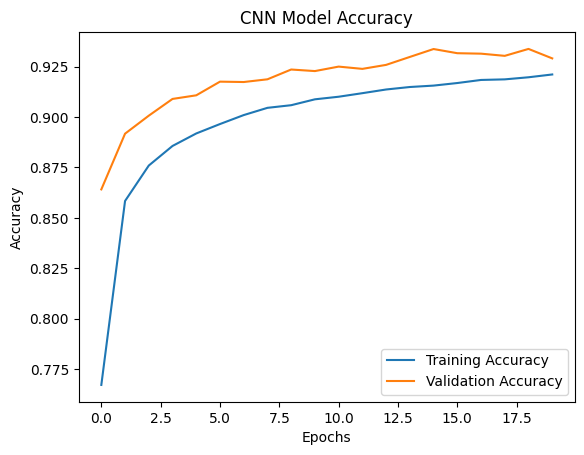

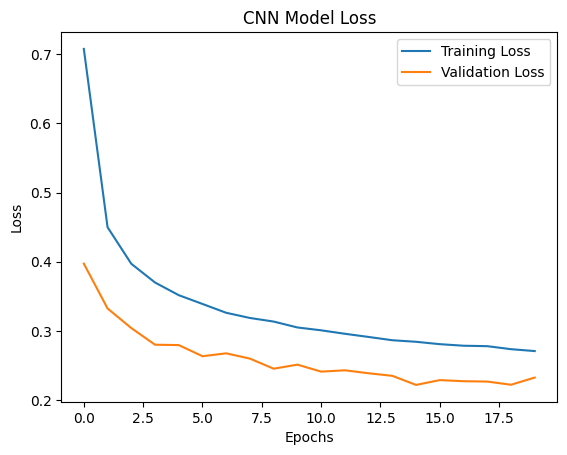

In [ ]:
# Evaluate the CNN model
loss_cnn, accuracy_cnn = cnn_model.evaluate(X_test_cnn, y_test)
print(f"CNN Test Loss: {loss_cnn}, Test Accuracy: {accuracy_cnn}")

# Plot the training history for CNN
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss Curve for CNN
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### 3.1.1 CNN - Saved Model (RUN THIS WHEN REVISTING)

In [ ]:
# Save the model
cnn_model.save('cnn_activity_classification_model.keras')

#cnn_model = load_model('cnn_activity_classification_model.keras')

In [ ]:
joblib.dump(cnn_model, 'cnn_model.pkl')

['cnn_model.pkl']

### 3.2 CNN+ LSTM Model

In [ ]:
# Reshaping the data for CNN-LSTM
X_train_cnnlstm = np.expand_dims(X_train, axis=2)
X_test_cnnlstm = np.expand_dims(X_test, axis=2)


In [ ]:
# Build CNN-LSTM Model
cnnlstm_model = Sequential()

# First Conv Layer
cnnlstm_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnnlstm.shape[1], X_train_cnnlstm.shape[2])))
cnnlstm_model.add(MaxPooling1D(pool_size=2))

# Second Conv Layer
cnnlstm_model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnnlstm_model.add(MaxPooling1D(pool_size=2))

# LSTM Layer
cnnlstm_model.add(LSTM(64))

# Fully Connected Layers
cnnlstm_model.add(Dense(128, activation='relu'))
cnnlstm_model.add(Dropout(0.5))

cnnlstm_model.add(Dense(64, activation='relu'))
cnnlstm_model.add(Dropout(0.5))

# Output Layer
cnnlstm_model.add(Dense(len(np.unique(y)), activation='softmax'))  # Number of classes = unique activities

# Compile the model
cnnlstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_cnnlstm = cnnlstm_model.fit(X_train_cnnlstm,
                                     y_train,
                                     batch_size=32,
                                     epochs=20,
                                     validation_data=(X_test_cnnlstm, y_test)
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 76s 8ms/step - accuracy: 0.6709 - loss: 0.9694 - val_accuracy: 0.8865 - val_loss: 0.3480
Epoch 2/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step - accuracy: 0.8781 - loss: 0.4009 - val_accuracy: 0.9095 - val_loss: 0.2801
Epoch 3/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - accuracy: 0.9008 - loss: 0.3323 - val_accuracy: 0.9163 - val_loss: 0.2684
Epoch 4/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 83s 7ms/step - accuracy: 0.9117 - loss: 0.3018 - val_accuracy: 0.9219 - val_loss: 0.2560
Epoch 5/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 70s 7ms/step - accuracy: 0.9188 - loss: 0.2807 - val_accuracy: 0.9233 - val_loss: 0.2536
Epoch 6/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 66s 7ms/step - accuracy: 0.9247 - loss: 0.2627 - val_accuracy: 0.9288 - val_loss: 0.2323
Epoch 7/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 83s 7ms/step - accuracy: 0.9272 - loss: 0.2531 - val_accuracy: 0.9357 - val_loss: 0.2210
Epoch 8/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step - accuracy: 0.9284 - loss: 0

#### CNN + LSTM Model Evaluation

2337/2337 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9429 - loss: 0.1989
CNN-LSTM Test Loss: 0.19594848155975342, Test Accuracy: 0.9430351853370667


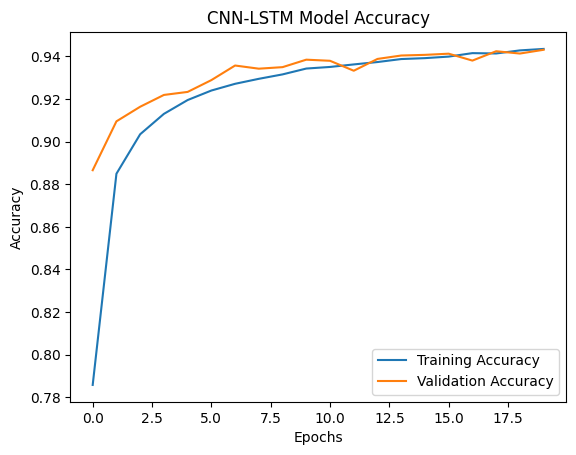

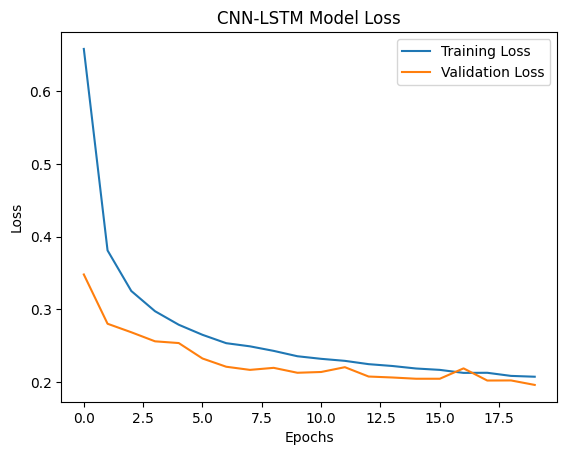

In [ ]:
# Evaluate the CNN-LSTM model
loss_cnnlstm, accuracy_cnnlstm = cnnlstm_model.evaluate(X_test_cnnlstm, y_test)
print(f"CNN-LSTM Test Loss: {loss_cnnlstm}, Test Accuracy: {accuracy_cnnlstm}")

# Plot the training history for CNN-LSTM
plt.plot(history_cnnlstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnnlstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN-LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss Curve for CNN-LSTM
plt.plot(history_cnnlstm.history['loss'], label='Training Loss')
plt.plot(history_cnnlstm.history['val_loss'], label='Validation Loss')
plt.title('CNN-LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### 3.2.1CNN+LSTM Saved Model (RUN THIS WHEN REVISITING)

In [ ]:
# Save the model
cnnlstm_model.save('cnnlstm_activity_classification_model.keras')
#cnnlstm_model = load_model('cnnlstm_activity_classification_model.keras')

In [ ]:
joblib.dump(cnnlstm_model, 'cnnlstm_model.pkl')

['cnnlstm_model.pkl']

### 3.3 Deep Neural Network

In [ ]:
# Build DNN Model
dnn_model = Sequential()

# First Dense Layer
dnn_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Dropout Layer
dnn_model.add(Dropout(0.5))

# Second Dense Layer
dnn_model.add(Dense(64, activation='relu'))

# Dropout Layer
dnn_model.add(Dropout(0.5))

# Output Layer
dnn_model.add(Dense(len(np.unique(y)), activation='softmax'))  # Number of classes = unique activities

# Compile the model
dnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_dnn = dnn_model.fit(X_train,
                            y_train,
                            batch_size=32,
                            epochs=20,
                            validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.5870 - loss: 1.2254 - val_accuracy: 0.8289 - val_loss: 0.5119
Epoch 2/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 70s 3ms/step - accuracy: 0.7642 - loss: 0.6931 - val_accuracy: 0.8584 - val_loss: 0.4340
Epoch 3/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.7849 - loss: 0.6349 - val_accuracy: 0.8648 - val_loss: 0.4059
Epoch 4/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.7950 - loss: 0.6083 - val_accuracy: 0.8733 - val_loss: 0.3861
Epoch 5/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.8011 - loss: 0.5915 - val_accuracy: 0.8760 - val_loss: 0.3804
Epoch 6/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.8060 - loss: 0.5784 - val_accuracy: 0.8779 - val_loss: 0.3743
Epoch 7/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8085 - loss: 0.5713 - val_accuracy: 0.8815 - val_loss: 0.3665
Epoch 8/20
9348/9348 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.8109 - loss: 0

#### Deep Neural Network Model Evaluation

2337/2337 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8902 - loss: 0.3375
DNN Test Loss: 0.33358830213546753, Test Accuracy: 0.8911784887313843


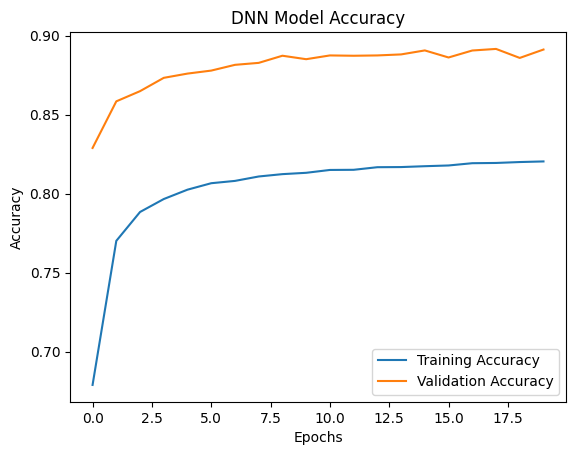

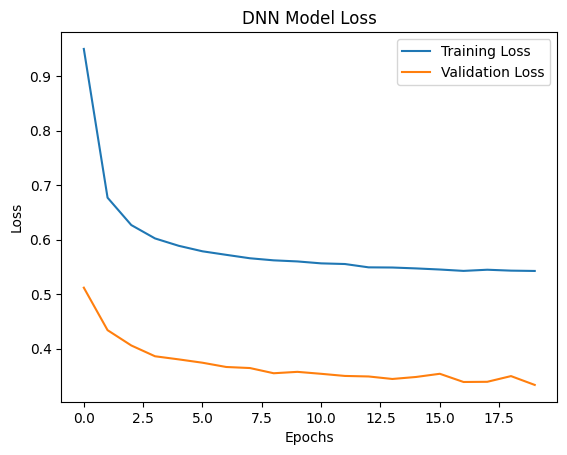

In [ ]:
# Evaluate the DNN model
loss_dnn, accuracy_dnn = dnn_model.evaluate(X_test, y_test)
print(f"DNN Test Loss: {loss_dnn}, Test Accuracy: {accuracy_dnn}")

# Plot the training history for DNN
plt.plot(history_dnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_dnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('DNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss Curve for DNN
plt.plot(history_dnn.history['loss'], label='Training Loss')
plt.plot(history_dnn.history['val_loss'], label='Validation Loss')
plt.title('DNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### 3.3.1 Deep Neural Network Saved Model (RUN THIS WHEN REVISITING)

In [ ]:
# Save the model
dnn_model.save('dnn_activity_classification_model.keras')

In [ ]:
joblib.dump(dnn_model, 'dnn.pkl')

['dnn.pkl']

### 3.4 Anomalies Detection Using CNNLSTM Model and Isolation Forest

In [ ]:
cnnlstm_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 10, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 3, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 13)                  │             845 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 275,369 (1.05 MB)

 Trainable params: 91,789 (358.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 183,580 (717.11 KB)

In [ ]:
# Extract features from the LSTM layer (lstm_1) and the Dense layer (dense_5)

feature_extractor = Model([cnnlstm_model.inputs],
 [cnnlstm_model.get_layer('conv1d_3').output,
  cnnlstm_model.get_layer('dense_5').output])

# Get the output of the LSTM layer and Dense layer
cnn_lstm_features_train = feature_extractor.predict(X_train_cnnlstm)
cnn_lstm_features_test = feature_extractor.predict(X_test_cnnlstm)


9348/9348 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step
2337/2337 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step


In [ ]:
conv1d_features_train, dense_features_train = cnn_lstm_features_train
conv1d_features_test, dense_features_test = cnn_lstm_features_test

# Flatten the features separately for each layer output
conv1d_features_train_flattened = conv1d_features_train.reshape(conv1d_features_train.shape[0], -1)
dense_features_train_flattened = dense_features_train.reshape(dense_features_train.shape[0], -1)

conv1d_features_test_flattened = conv1d_features_test.reshape(conv1d_features_test.shape[0], -1)
dense_features_test_flattened = dense_features_test.reshape(dense_features_test.shape[0], -1)

# concatenate both sets of features
cnn_lstm_features_train_combined = np.concatenate([conv1d_features_train_flattened, dense_features_train_flattened], axis=1)
cnn_lstm_features_test_combined = np.concatenate([conv1d_features_test_flattened, dense_features_test_flattened], axis=1)


In [ ]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit the model to the extracted features (training data)
iso_forest.fit(cnn_lstm_features_train_combined)

# Predict anomalies for the test data
anomalies = iso_forest.predict(cnn_lstm_features_test_combined)  # 1 for normal, -1 for anomaly
anomalies = anomalies == -1  # Convert to boolean (True = Anomaly, False = Normal)

In [ ]:
joblib.dump(iso_forest, 'iso_forest_model.pkl')

['iso_forest_model.pkl']

### 3.4.1 PCA Visualisation

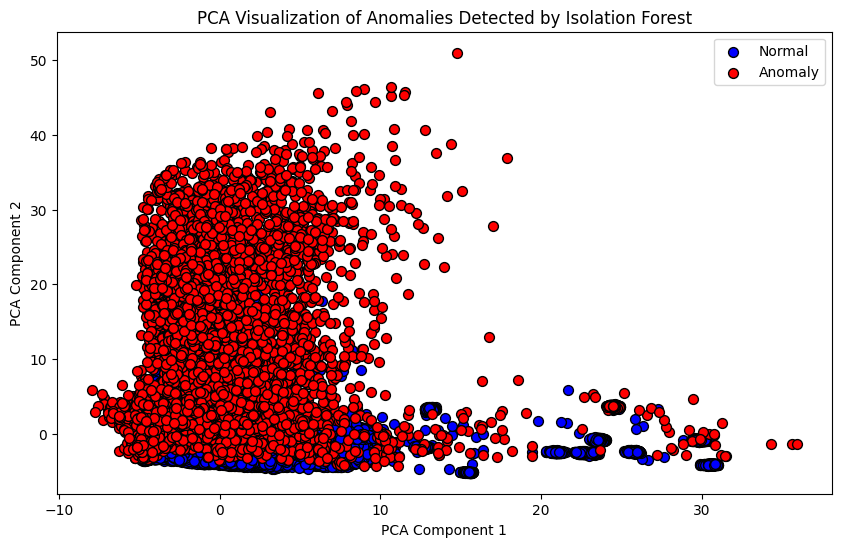

In [ ]:
# Reduce dimensionality for easier visualization (PCA)
pca = PCA(n_components=3)
features_2d = pca.fit_transform(cnn_lstm_features_test_combined)

# Visualize the anomalies
plt.figure(figsize=(10, 6))

# Plot the normal points
plt.scatter(features_2d[~anomalies, 0],
            features_2d[~anomalies, 1],
            c='blue', label='Normal', edgecolor='k', s=50)

# Plot the anomalies
plt.scatter(features_2d[anomalies, 0],
            features_2d[anomalies, 1],
            c='red', label='Anomaly', edgecolor='k', s=50)

plt.title('PCA Visualization of Anomalies Detected by Isolation Forest')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

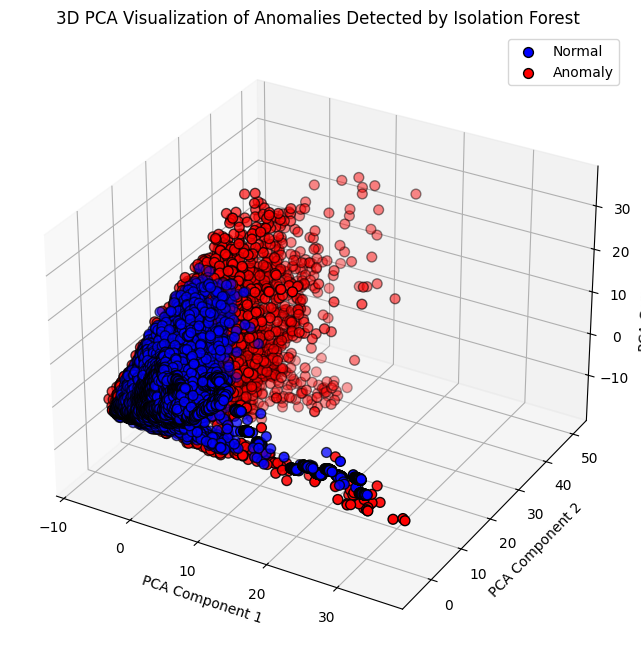

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce dimensionality to 3 components for easier visualization
pca = PCA(n_components=3)
features_3d = pca.fit_transform(cnn_lstm_features_test_combined)

# Visualize the anomalies in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the normal points
ax.scatter(features_3d[~anomalies, 0],
           features_3d[~anomalies, 1],
           features_3d[~anomalies, 2],
           c='blue', label='Normal', edgecolor='k', s=50)

# Plot the anomalies
ax.scatter(features_3d[anomalies, 0],
           features_3d[anomalies, 1],
           features_3d[anomalies, 2],
           c='red', label='Anomaly', edgecolor='k', s=50)

ax.set_title('3D PCA Visualization of Anomalies Detected by Isolation Forest')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()
plt.show()


In [ ]:
# Uncomment once and run the file to get access to all the necessary libraries
%pip install -r requirements.txt
%pip install --upgrade openai langchain
!apt-get install -y poppler-utils
!apt-get install -y tesseract-ocr
!apt-get install -y libmagic1

  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
ERROR: Operation cancelled by user
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libmagic1 is already the newest version (1:5.41-3ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# Latest update to the langchain package causing issue here
!pip uninstall httpx -y

Found existing installation: httpx 0.28.1
Uninstalling httpx-0.28.1:
  Successfully uninstalled httpx-0.28.1


In [ ]:
!pip show httpx

In [ ]:
!pip show httpx

# 4. Generative AI

### SQL Graph

In [ ]:
load_dotenv("template.env")


True

In [ ]:
# Let's connect to the database again
db = SQLDatabase.from_uri("sqlite:///mhealth.db")
print(db.dialect)
print(db.get_usable_table_names())
db.run("SELECT DISTINCT subject FROM mobile_health LIMIT 5")

sqlite
['mobile_health']


"[('subject1',), ('subject2',), ('subject3',), ('subject4',), ('subject5',)]"

In [ ]:
# Tracing via Langsmith
trace = os.getenv("LANGCHAIN_TRACING_V2")
langsmith = os.getenv("LANGCHAIN_API_KEY")
openai_api_key = os.getenv("OPENAI_API_KEY")

# Check if openai_api_key is set, and if not, raise an error with instructions
if openai_api_key is None:
    raise ValueError(
        "The OPENAI_API_KEY environment variable is not set. "
        "Please set it to your OpenAI API key or pass it directly to ChatOpenAI."
    )

# Build a GPT model
gpt = ChatOpenAI(
    model = "gpt-4-turbo",
    temperature=0,
    openai_api_key = openai_api_key #Use variable instead of calling get env
)
# Incase we do any embeddings
embeddings = OpenAIEmbeddings(
    model="text-embedding-3-large",
    openai_api_key = openai_api_key #Use variable instead of calling get env
)

# Little test
response = gpt.invoke("Why Abhi bang the table?")
print(response.content)

It's not clear from your question why "Abhi" banged the table as there is no specific context or background information provided about the situation. People might bang on a table for various reasons, such as expressing frustration, getting attention, emphasizing a point during a discussion, or out of excitement. If you can provide more details or context, I might be able to offer a more precise explanation.


In [ ]:
 # LangGraph create our workflow!
class SqlState(TypedDict):
    question: str
    query: str
    result: str
    answer: str

query_prompt_template = hub.pull("langchain-ai/sql-query-system-prompt")

# Make sure we only have one message
assert len(query_prompt_template.messages) == 1

# query_prompt_template.messages[0].pretty_print()

# Create our personalised pydantic model
class QueryOutput(TypedDict):
    """Generated SQL query."""
    query: Annotated[str, ..., "Syntactically valid SQL query."] #This serves as an hint to what kind of query is acceptable!

def write_query(state: SqlState):
    """Generate SQL query to fetch information."""
    prompt = query_prompt_template.invoke(
        {
            "dialect": db.dialect,
            "top_k": 5,
            "table_info": db.get_table_info(),
            "input": state["question"],
        }
    )
    structured_llm = gpt.with_structured_output(QueryOutput)
    result = structured_llm.invoke(prompt)
    return {"query": result["query"]}

# print(write_query({"question": "How many rows are there?"}))

def execute_query(state: SqlState):
    """Execute SQL query"""
    execute_query_tool = QuerySQLDataBaseTool(db=db)
    return {"result": execute_query_tool.invoke(state["query"])}

# print(execute_query(write_query({"question": "How many Employees are there?"})))

def generate_answer(state: SqlState):
    """Answer question using retrieved information as context."""
    prompt = (
        "Given the following user question, corresponding SQL query, "
        "and SQL result, answer the user question.\n\n"
        f'Question: {state["question"]}\n'
        f'SQL Query: {state["query"]}\n'
        f'SQL Result: {state["result"]}'
    )
    response = gpt.invoke(prompt)
    return {"answer": response.content}

graph_builder = StateGraph(SqlState).add_sequence(
    [write_query, execute_query, generate_answer]
)
graph_builder.add_edge(START, "write_query")
graph = graph_builder.compile()

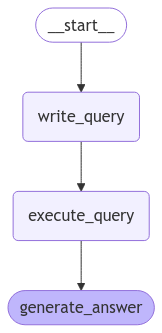

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({"question": "How many rows are there?"})['answer']


<ipython-input-26-db73271eb35c>:38: LangChainDeprecationWarning: The class `QuerySQLDataBaseTool` was deprecated in LangChain 0.3.12 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-community package and should be used instead. To use it run `pip install -U :class:`~langchain-community` and import as `from :class:`~langchain_community.tools import QuerySQLDatabaseTool``.
  execute_query_tool = QuerySQLDataBaseTool(db=db)


'The SQL query provided counts the total number of rows in the table `mobile_health`. According to the SQL result, there are 1,215,745 rows in the table.'

In [ ]:
# Function to process the question and get the answer
memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory, interrupt_before=["execute_query"])

def answer_question():
    question = {'question': input("What is your SQL related question? ")}
    config = {"configurable": {"thread_id": "1"}}

    # Run the graph and handle direct answers for simple queries
    for step in graph.stream(question, config, stream_mode="updates"):
        pass  # Placeholder for cleaner flow handling

    # Retrieve the final state and check for simple answer scenarios
    try:
        user_approval = input("Do you want to execute the query? (yes/no): ")
    except Exception:
        user_approval = "no"

    if user_approval.lower() == "yes":
        # Check if the query involves counting distinct values (e.g., number of subjects)
        if "subject" in question['question'].lower() and "how many" in question['question'].lower():
            for state in graph.stream(None, config, stream_mode="values"):
                pass

            final_output = state.get("answer")
            print(f"Final Answer: {final_output}")
        else:
            for state in graph.stream(None, config, stream_mode="values"):
                pass

            final_output = state.get("answer")
            print(f"Final Answer: {final_output}")

    else:
        for state in graph.stream(None, config, stream_mode="values"):
            pass

        generated_query = state.get("query")
        print(f"Operation cancelled by user. Here is the query: {generated_query}")


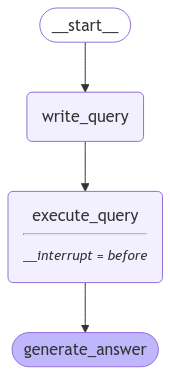

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
answer_question()

What is your SQL related question? how many subjects are there
Do you want to execute the query? (yes/no): yes
Final Answer: There are 10 distinct subjects.


# 4.1 Generating User Interface

In [ ]:
# Function to process the question and execute the workflow
def process_question(question, execute):
    state = {"question": question}

    # Generate SQL query
    generated_query = write_query(state)["query"]
    state["query"] = generated_query

    # If the user chooses to execute, fetch the result and generate the answer
    if execute:
        query_result = execute_query(state)["result"]
        state["result"] = query_result
        final_answer = generate_answer(state)["answer"]
        return generated_query, query_result, final_answer

    # If the user declines execution, return the query only
    return generated_query, "Execution skipped", "Execution skipped"

In [ ]:
banner_url = "https://img.freepik.com/premium-vector/patient-smiles-while-interacting-with-healthcare-provider-oncology-consultation-customizable-cartoon-illustration-oncology-patients_585735-38025.jpg"

# Define the Gradio interface
with gr.Blocks() as demo:
    # gr.Image(f"{banner_url}", elem_id="header-image")
    gr.Markdown(f"""
    <div style="text-align: center; margin-bottom: 20px;">
        <img src="{banner_url}" alt="Doctor Banner" style="max-width: 60%; height: auto; margin-inline: auto;">
    </div>
    """)

    gr.Markdown("""# Review Assistant
    To review dataset, please input relevant questions and execute the query.
    """)

    with gr.Row():
        question_input = gr.Textbox(label="Enter your SQL Question", placeholder="e.g., How many rows are there?", lines=1)
        execute_checkbox = gr.Checkbox(label="Execute Query", value=False)

    submit_button = gr.Button("Submit")

    with gr.Row():
        query_output = gr.Textbox(label="Generated SQL Query", lines=2, interactive=False)
        result_output = gr.Textbox(label="Query Result", lines=5, interactive=False)
        answer_output = gr.Textbox(label="Final Answer", lines=5, interactive=False)

    submit_button.click(
        process_question,
        inputs=[question_input, execute_checkbox],
        outputs=[query_output, result_output, answer_output],
    )

# Launch the app
demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4aace4d62d49d7e611.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
